### Data insights - expansion

### Comentários e conclusões:

- Gostaria de trazer elementos de Infográfico para o Dashboard
- Tipos de gráficos utilizados:scatterplot, barras, rosca, área, radar chart
- É necessário encontrar uma forma de comunicar os resultados do PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 200
from sklearn.decomposition import PCA

In [2]:
compfin = pd.read_pickle('compfin.pkl')

In [3]:
compfin.head()

,carteira_2016,organizacao,nome_projeto,area,valor_total,beneficiarios,solicitado_iCSHG,carga_horaria,ativo_2014,ativo_2015,pl_2014,pl_2015,receitas_2014,receitas_2015,despesas_2014,despesas_2015,rec_empresas_2015,rec_fundacao_instituto_2015,rec_pf_2015,rec_governo_2015,rec_outros_2015,d_projetos,d_gerais_e_admin,d_folha_de_pagamento,d_outros,per_capita,beneficiarios_iCSHG,per_capita_por_hora,has_detailed_info,has_consolidated_info
0,0,ABCD,Todos aprendem,Professores,NaN,NaN,NaN,NaN,13380.0,4614.0,12725.0,3831.0,21611.0,1478.0,15019.0,14631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,0,Abrale,Programa de Apoio ao Paciente,Combate à Vulnerabilidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2,Abrinq,Creche,Combate à Vulnerabilidade,324052.0,1000.0,147156.0,16.0,34276.0,34491.0,15496.0,15491.0,35047.0,33150.0,32427.0,33008.0,10743701.0,1555494.0,18349678.0,0.0,2500973.0,10800202.0,15217734.0,6588124.0,402220.0,324.052,454.112303,20.25325,True,True
3,0,Acaia,Ateliescola Acaia,Educação Infantil,NaN,NaN,NaN,NaN,43034.0,43929.0,621.0,285.0,93451.0,104931.0,93752.0,105267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,0,Acreditar,Fundo de Negócio “As Marias”,Combate à Vulnerabilidade,NaN,NaN,NaN,NaN,12075.0,11453.0,5613.0,6553.0,NaN,8536.0,NaN,7596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [4]:
print(compfin.columns.values)

['carteira_2016' 'organizacao' 'nome_projeto' 'area' 'valor_total'
 'beneficiarios' 'solicitado_iCSHG' 'carga_horaria' 'ativo_2014'
 'ativo_2015' 'pl_2014' 'pl_2015' 'receitas_2014' 'receitas_2015'
 'despesas_2014' 'despesas_2015' 'rec_empresas_2015'
 'rec_fundacao_instituto_2015' 'rec_pf_2015' 'rec_governo_2015'
 'rec_outros_2015' 'd_projetos' 'd_gerais_e_admin' 'd_folha_de_pagamento'
 'd_outros' 'per_capita' 'beneficiarios_iCSHG' 'per_capita_por_hora'
 'has_detailed_info' 'has_consolidated_info']


### Let's expand all ideas to further converge them in a report

- barr
- scatter
- histogram
- explore some cool diagrams

In [5]:
# restrinjo a analise aos projetos com dados
compfin = compfin[compfin.has_detailed_info]
compfin = compfin.assign(id_org = lambda x: x.organizacao + ": " + x.nome_projeto)
compfin=compfin.sort_values('valor_total', ascending = False)

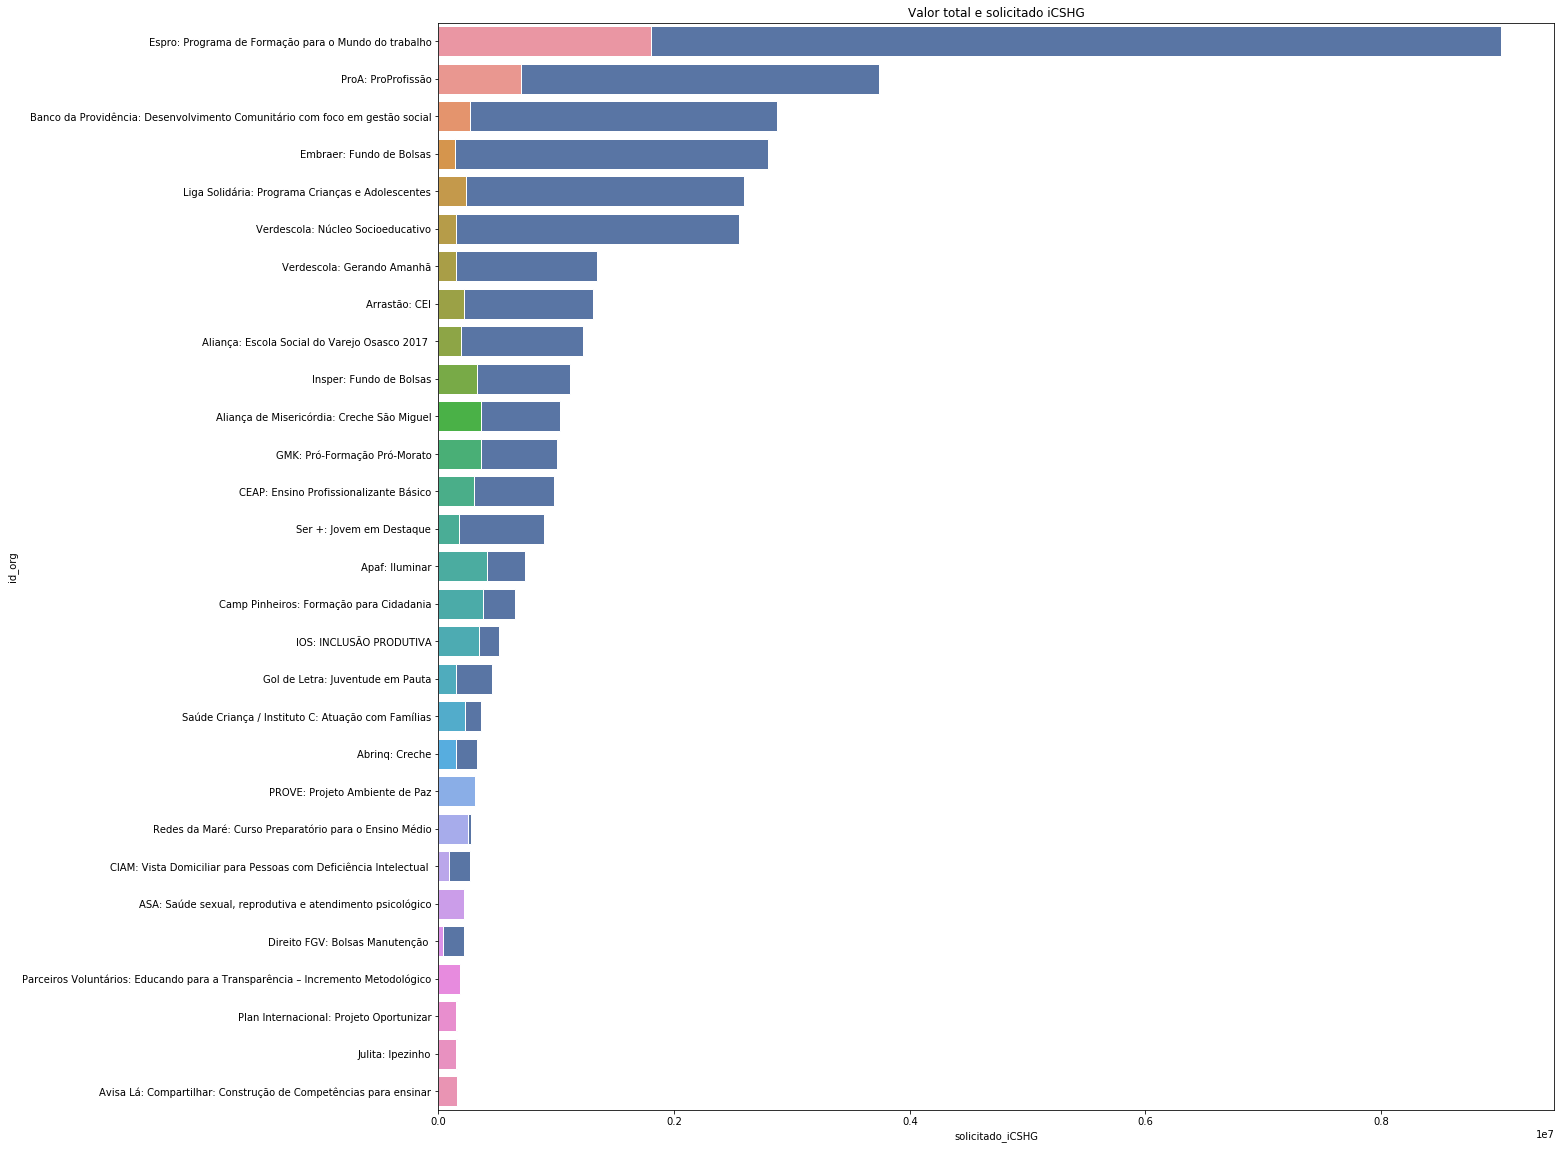

In [6]:
plt.figure(figsize=(20, 20))
plt.title("Valor total e solicitado iCSHG")
sns.set(style="whitegrid")
ax = sns.barplot(y= 'id_org', x='valor_total',
            data=compfin[['id_org', 'valor_total', 'solicitado_iCSHG']],
            orient="h", color = "b")
ax = sns.barplot(y= 'id_org', x='solicitado_iCSHG',
            data=compfin[['id_org', 'valor_total', 'solicitado_iCSHG']],
            orient="h")
plt.show()

- há projetos pequenos totalmente fundeados pelo iCSHG
- o % de custeio do iCHSG varia bastante mesmo em projetos de porte equivalente

## Ideia: um gráfico de área ficaria muito interessante (qudrados)

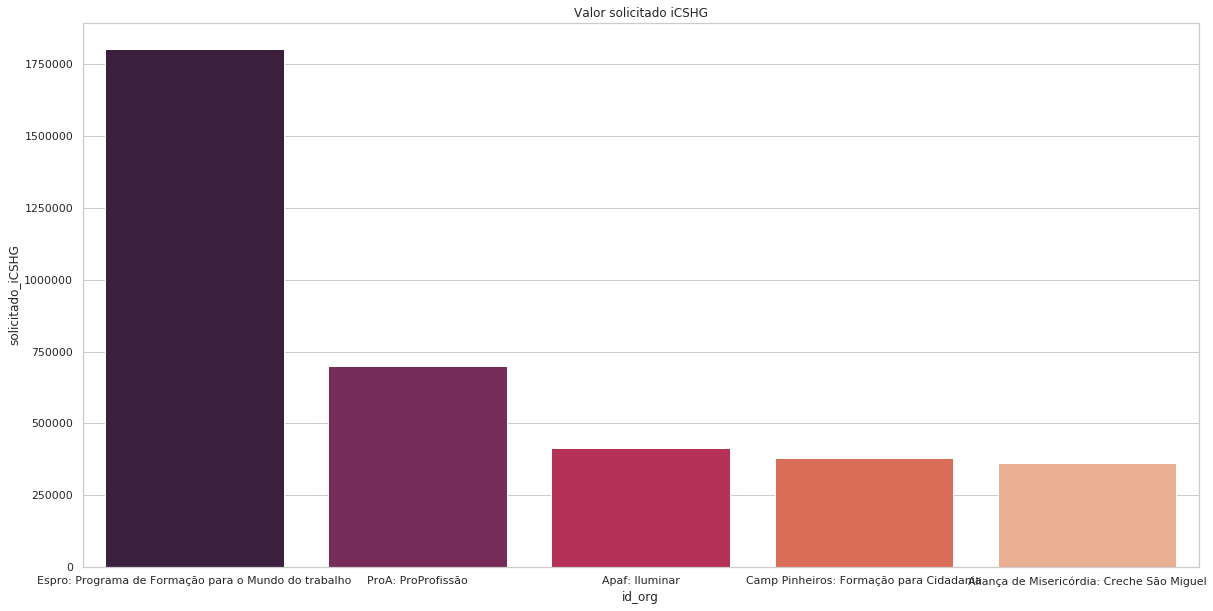

In [7]:
n_largest_iCSHG = compfin.groupby(['id_org']).solicitado_iCSHG.sum().nlargest(5).to_frame()
n_largest_iCSHG.reset_index(inplace=True)

plt.figure(figsize=(20, 10))
plt.title("Valor solicitado iCSHG")
sns.set(style="whitegrid")
ax = sns.barplot(y= 'solicitado_iCSHG', x='id_org',
            data=n_largest_iCSHG,
            orient="v", palette = "rocket")
plt.show()

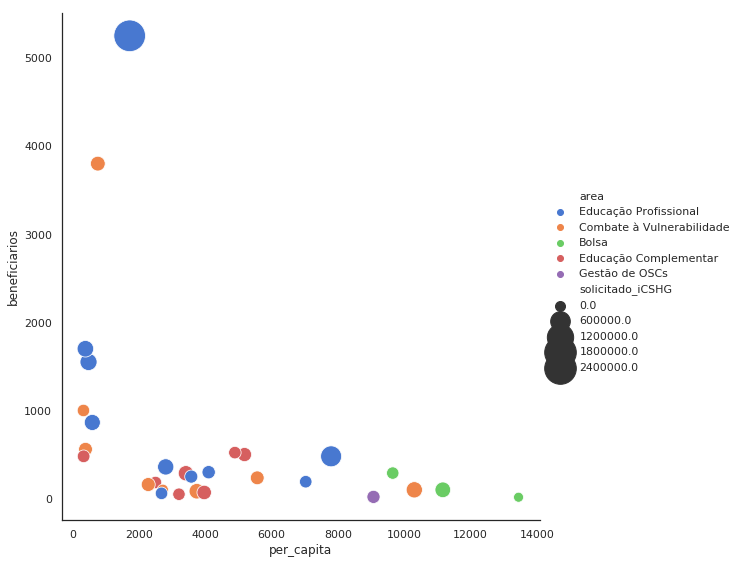

In [8]:
sns.set(style="white")
sns.relplot(x="per_capita", y="beneficiarios", 
            size="solicitado_iCSHG", sizes=(100, 1000), 
            data=compfin,
            height = 8,
            hue = 'area',
            palette="muted")
plt.show()

- bolsas tem alto valor per capita e menor número de beneficiários
- duas classes de projeto: per_capita baixo x beneficiarios baixo

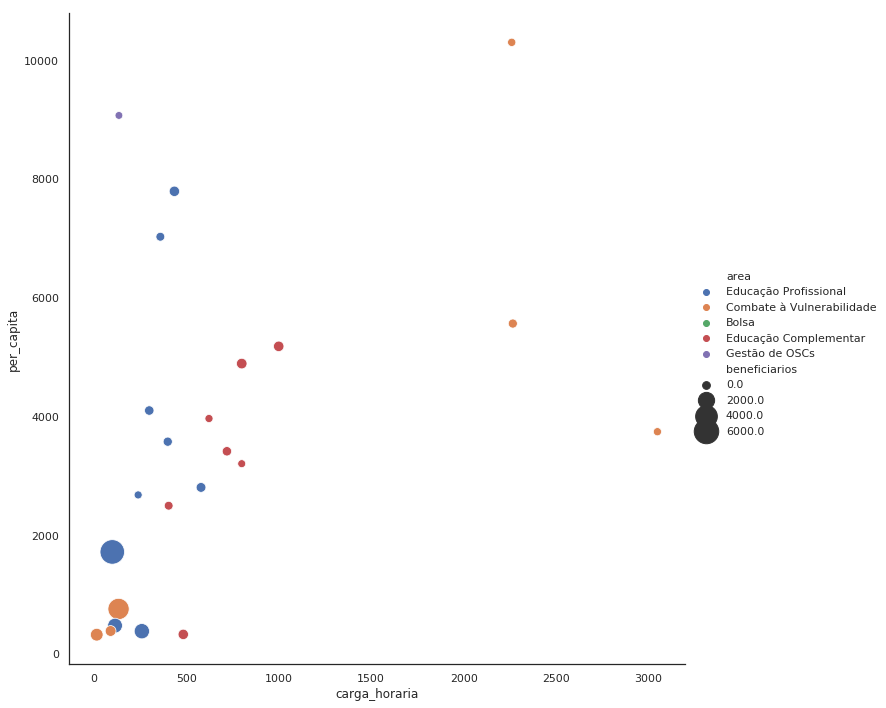

In [9]:
sns.set(style="white")
sns.relplot(x="carga_horaria", y="per_capita", 
            size="beneficiarios", sizes=(60, 600), 
            data=compfin,
            height = 10,
            hue = 'area'
             )
plt.show()

- cutoff de carga horária
- maior numero de beneficiarios concentra em per capita baixo e carga horária baixa
- balanceado

#### Sensação de que os plots não passam a noção do patamar dos números totais e médios

In [10]:
consolidated1 = compfin[compfin.valor_total > 0].groupby(['area']).\
nome_projeto.count().to_frame()
consolidated1.rename(columns={"nome_projeto": "counts"}, inplace=True)

consolidated2 = compfin[compfin.valor_total > 0].groupby(['area']).\
solicitado_iCSHG.sum().to_frame()

consolidated = pd.concat([consolidated1,consolidated2], axis=1, names = ['count','sum'])
consolidated.reset_index(inplace=True)
consolidated.sort_values('counts', inplace=True)

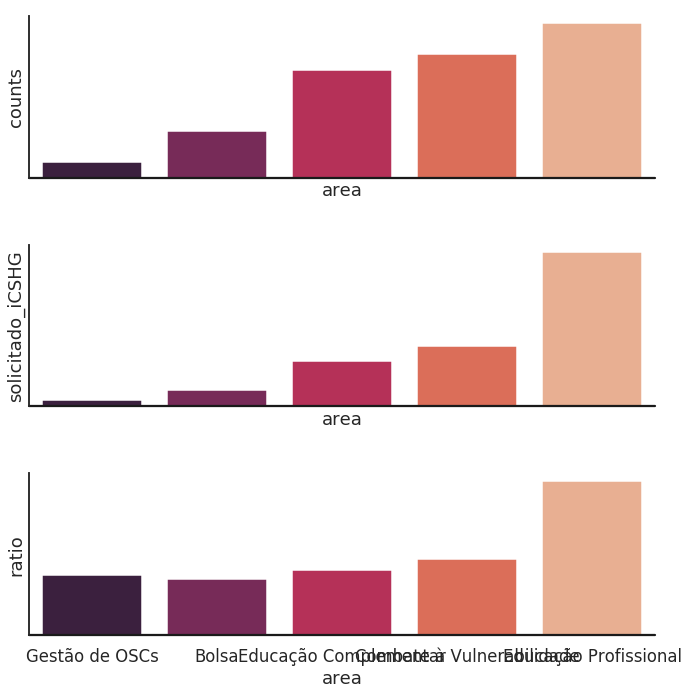

In [11]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Generate some sequential data
x = consolidated.area
y1 = consolidated.counts
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("counts")

# Center the data to make it diverging
x = consolidated.area
y2 = consolidated.solicitado_iCSHG
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("solicitado_iCSHG")

# Center the data to make it diverging
x = consolidated.area
y3 = consolidated.solicitado_iCSHG/consolidated.counts
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("ratio")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

- ordena
- a razao explode em Educação profissional

In [12]:
print()
print("Informação financeira agregada (MM): nota-se que há alguns grandes players")

fin_agg = compfin[['id_org', 'ativo_2015','pl_2015',
                    'receitas_2015','despesas_2015']] # Odd! Too low! Have to multiply by 1000


Informação financeira agregada (MM): nota-se que há alguns grandes players


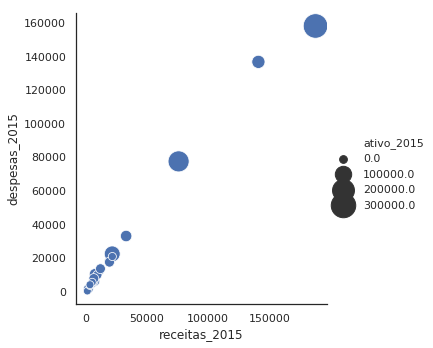

In [13]:
fin_agg = compfin[['id_org', 'ativo_2015',
                    'receitas_2015','despesas_2015']] # Odd! Too low! Have to multiply by 1000

sns.set(style="white")
sns.relplot(x="receitas_2015", y="despesas_2015", 
            size="ativo_2015", sizes=(60, 600), 

            data=fin_agg,
            height = 5             )
plt.show()

/home/nocedan/cshg-pyenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


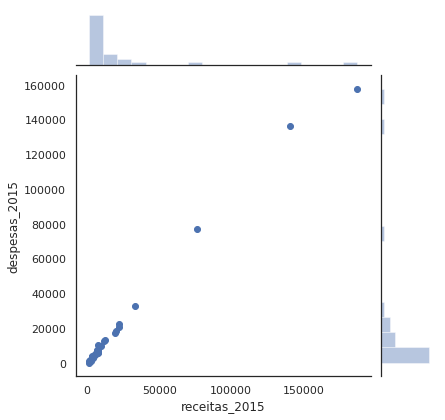

In [14]:
sns.jointplot(x=fin_agg.receitas_2015, y=fin_agg.despesas_2015, data=fin_agg)

In [15]:
#for id_org in fin_agg.id_org:
#    sns.barplot(data=fin_agg[fin_agg.id_org == id_org])
#    plt.title(id_org)
#    plt.show()


Receita detalhada (MM): nota-se que há alguns grandes players


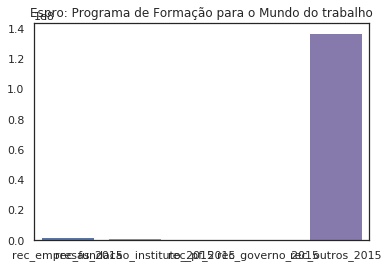

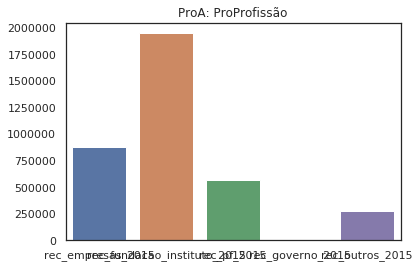

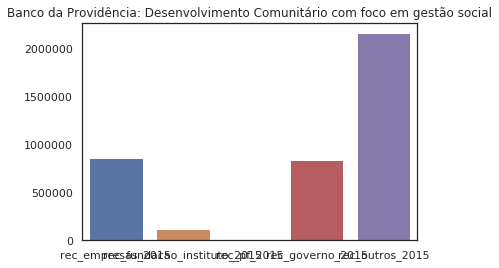

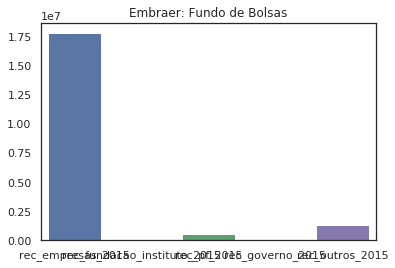

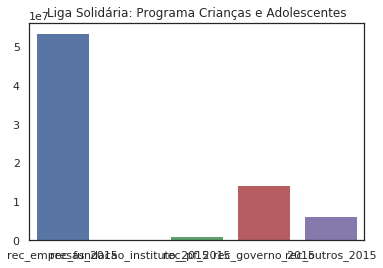

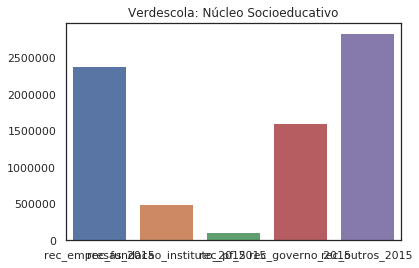

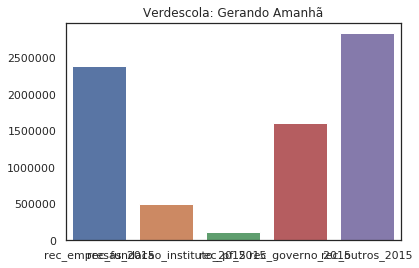

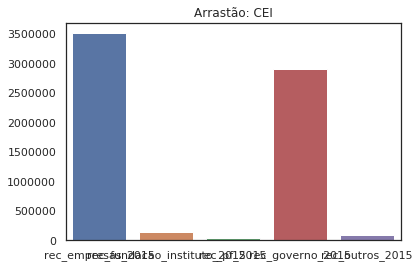

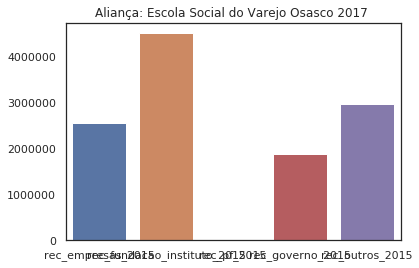

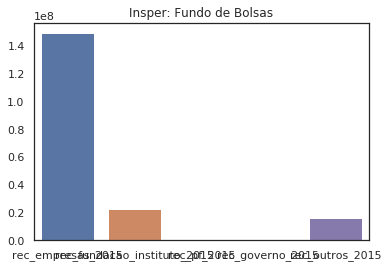

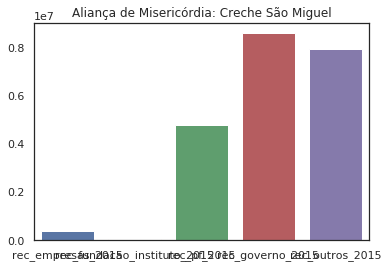

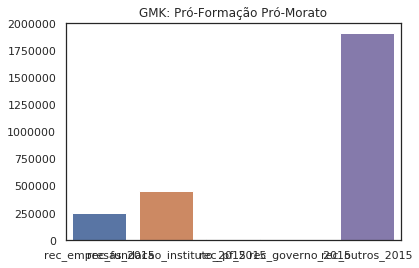

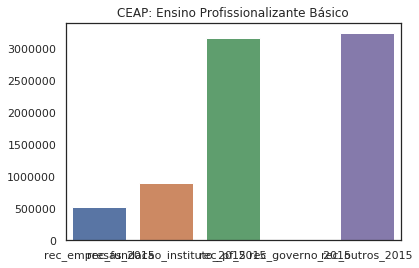

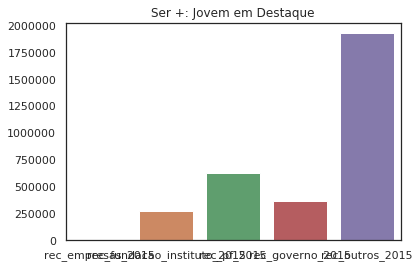

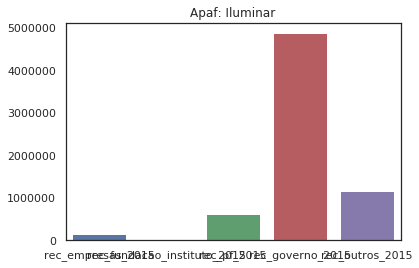

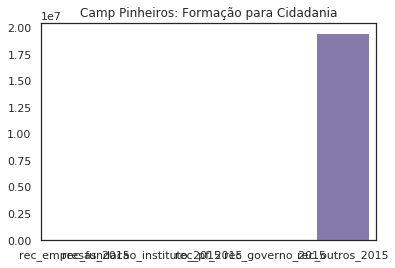

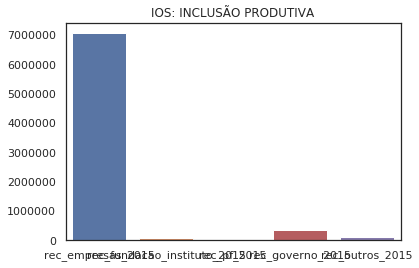

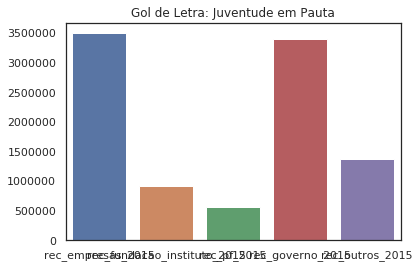

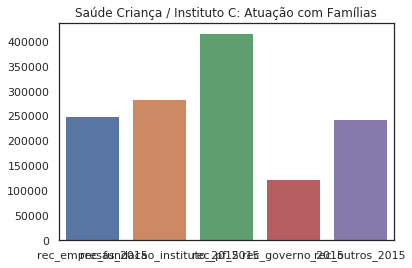

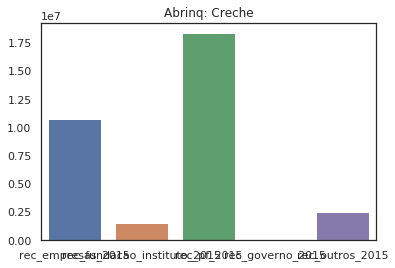

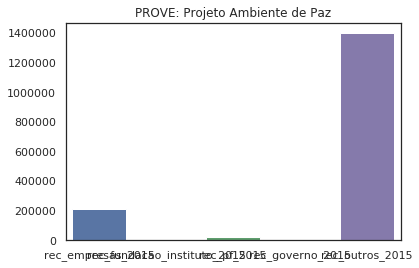

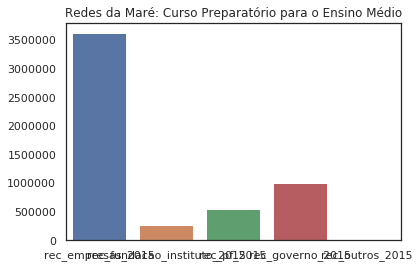

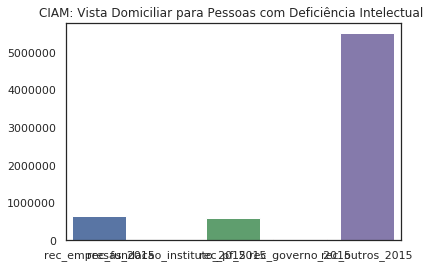

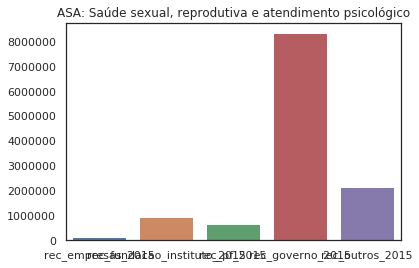

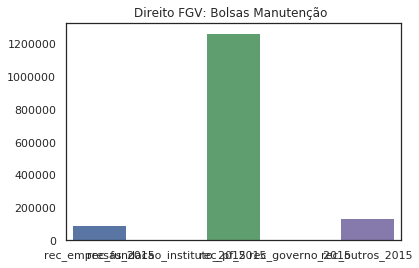

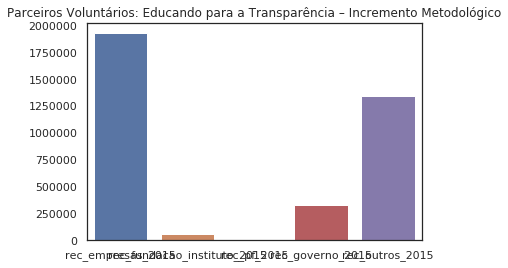

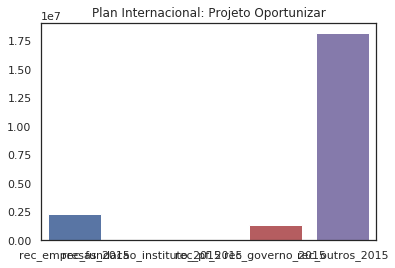

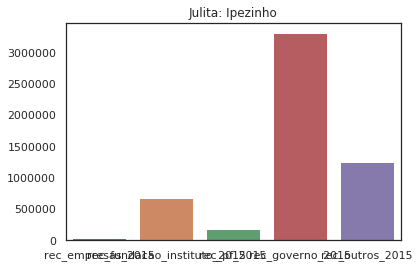

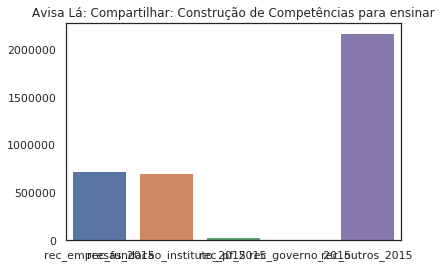

In [16]:
print()
print("Receita detalhada (MM): nota-se que há alguns grandes players")

rec_det = compfin[compfin.has_detailed_info][['id_org', 'rec_empresas_2015', 'rec_fundacao_instituto_2015', 'rec_pf_2015', 'rec_governo_2015',
       'rec_outros_2015']]
for id_org in fin_agg.id_org:
    sns.barplot(data=rec_det[rec_det.id_org == id_org])
    plt.title(id_org)
    plt.show()


Despesa detalhada (MM): nota-se que há alguns grandes players


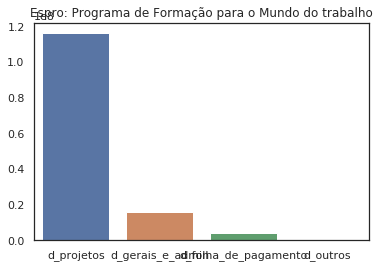

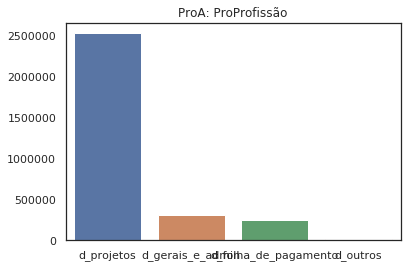

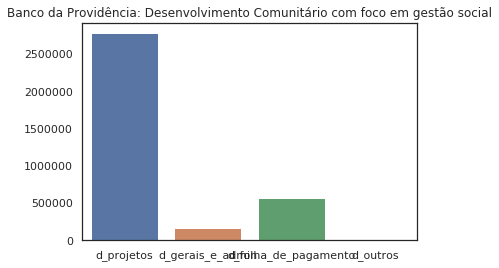

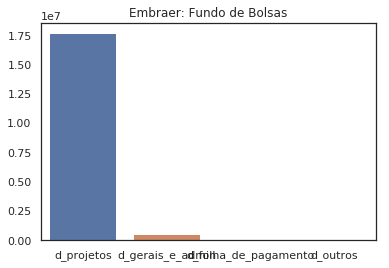

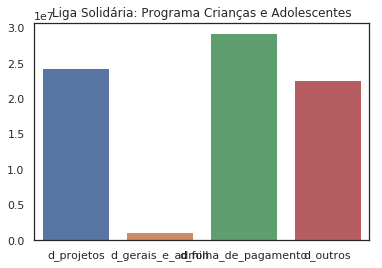

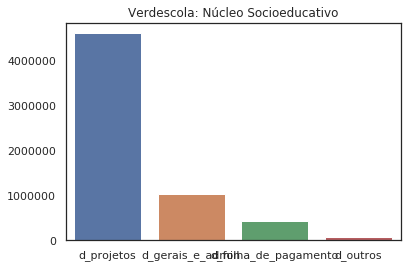

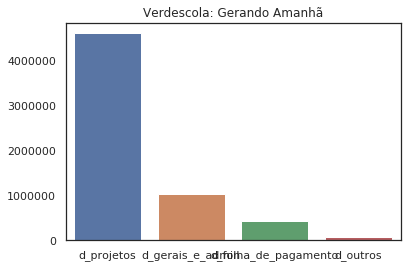

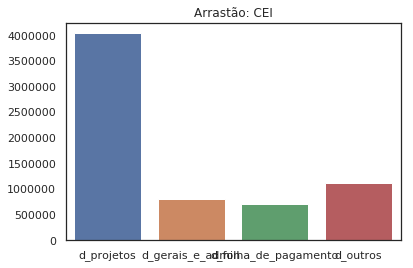

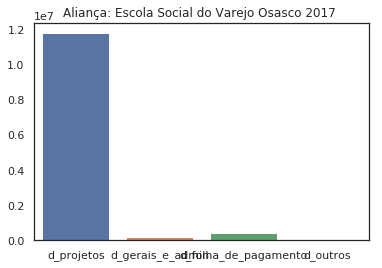

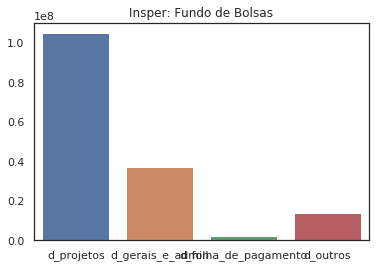

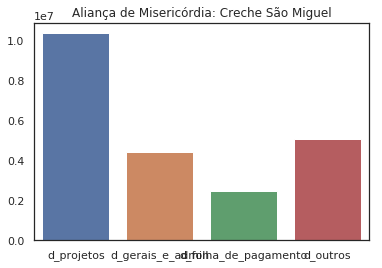

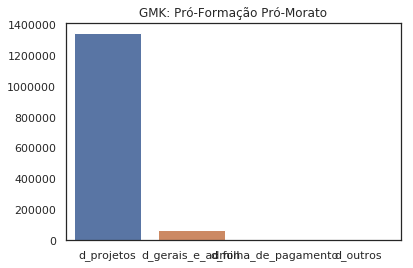

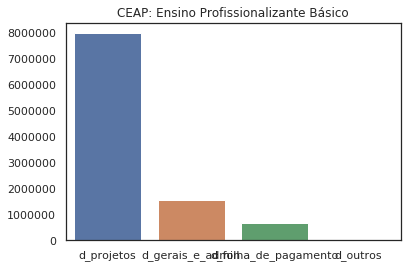

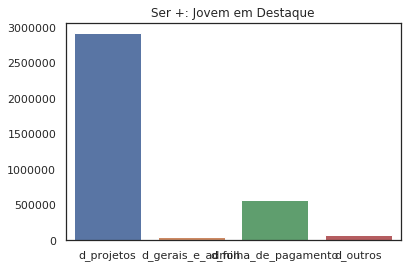

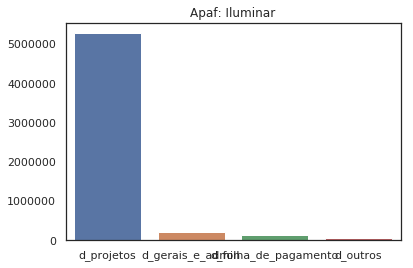

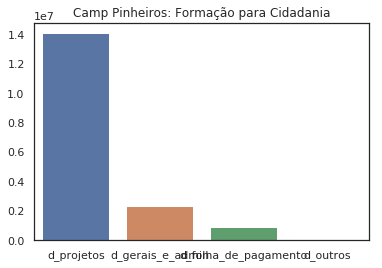

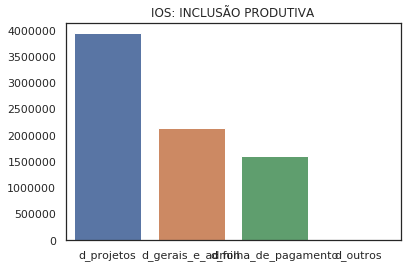

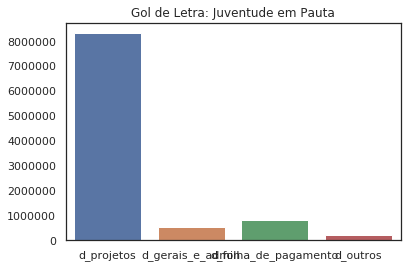

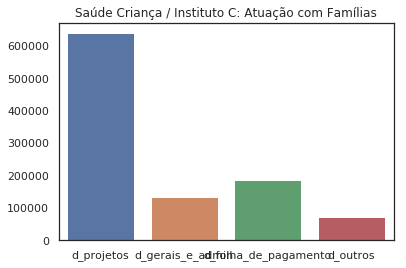

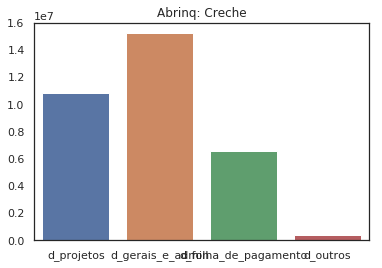

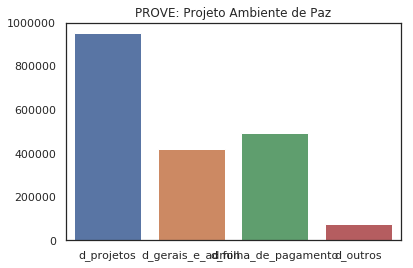

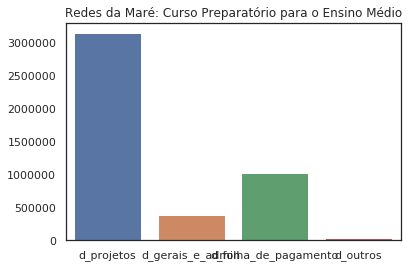

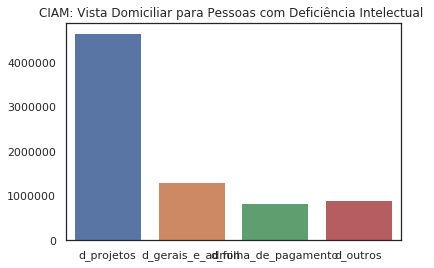

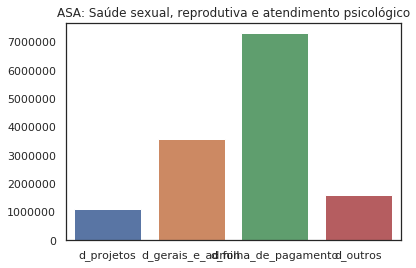

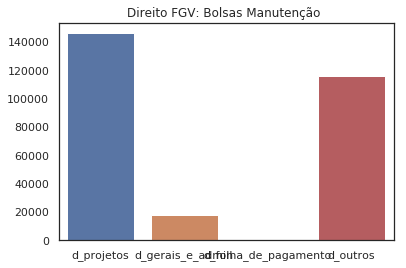

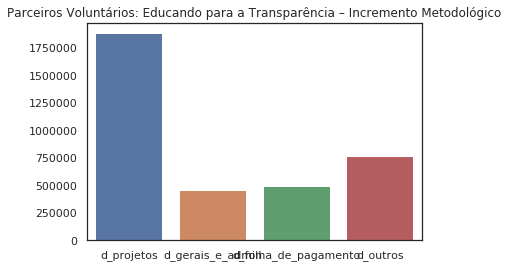

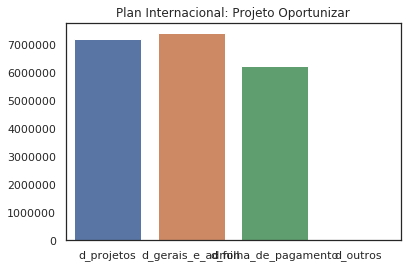

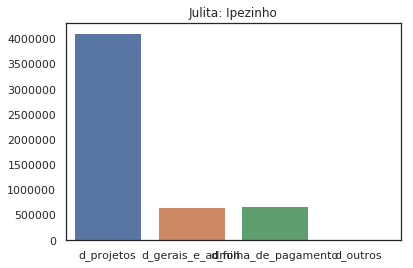

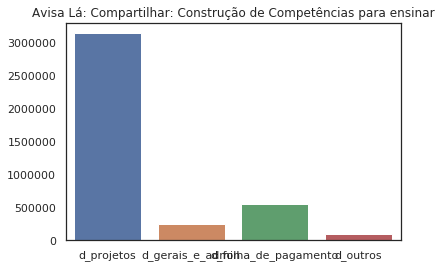

In [17]:
print()
print("Despesa detalhada (MM): nota-se que há alguns grandes players")

des_det = compfin[compfin.has_detailed_info][['id_org', 'd_projetos', 'd_gerais_e_admin',
       'd_folha_de_pagamento', 'd_outros']]
for id_org in fin_agg.id_org:
    sns.barplot(data=des_det[des_det.id_org == id_org])
    plt.title(id_org)
    plt.show()

### Ideia: é necessário : clusterizar, achar visualização adequada (plotly tem radar chart), ou t-sne x  pca

### Ideia: É importante transmitir os totais. Vai enriquecer o leitor.

In [18]:
rec_det = rec_det.set_index("id_org")

In [19]:
rec_det=rec_det.fillna(0)

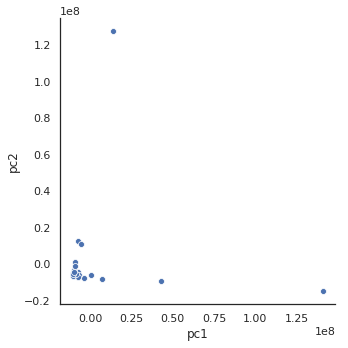

[0.56360723 0.41941587]
[[ 0.97836413  0.1312916  -0.00281147  0.01090451  0.15949712]
 [-0.15931362 -0.01074928 -0.0096306  -0.01578503  0.98699631]]


/home/nocedan/cshg-pyenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


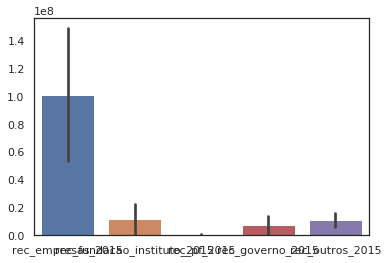

id_org
Insper: Fundo de Bolsas                             1.408351e+08
Liga Solidária: Programa Crianças e Adolescentes    4.307468e+07
Name: pc1, dtype: float64


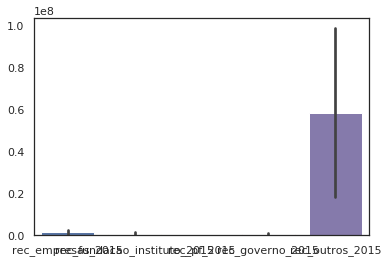

id_org
Espro: Programa de Formação para o Mundo do trabalho    1.278198e+08
Camp Pinheiros: Formação para Cidadania                 1.246386e+07
Plan Internacional: Projeto Oportunizar                 1.077217e+07
Name: pc2, dtype: float64


In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rec_det)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'], index = rec_det.index)
sns.relplot(x = 'pc1', y = 'pc2',data = principalDf)
plt.show()

finalDf = pd.concat([principalDf, rec_det], axis = 1)
print(pca.explained_variance_ratio_)
print(pca.components_)
r1 = rec_det[rec_det.index.isin(finalDf.pc1.nlargest(2).index)]
sns.barplot(data =r1)
plt.show()
print(finalDf.pc1.nlargest(2))

r2 = rec_det[rec_det.index.isin(finalDf.pc2.nlargest(3).index)]
sns.barplot(data =r2)
plt.show()
print(finalDf.pc2.nlargest(3))

In [21]:
des_det = des_det.set_index("id_org")

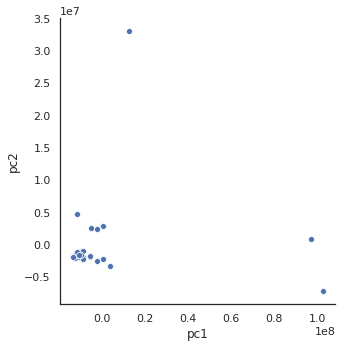

[0.9227794  0.05191481]
[[ 0.97079407  0.22643743  0.03408187  0.07157789]
 [-0.07641304  0.01610769  0.78860585  0.60992   ]]


/home/nocedan/cshg-pyenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


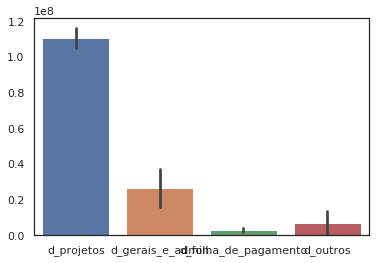

id_org
Espro: Programa de Formação para o Mundo do trabalho    1.026799e+08
Insper: Fundo de Bolsas                                 9.737580e+07
Name: pc1, dtype: float64


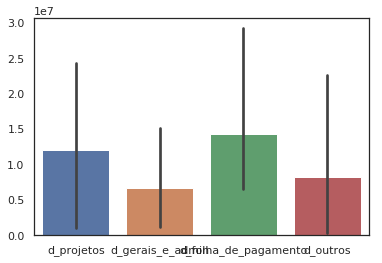

id_org
Liga Solidária: Programa Crianças e Adolescentes            3.304473e+07
ASA: Saúde sexual, reprodutiva e atendimento psicológico    4.762223e+06
Abrinq: Creche                                              2.915747e+06
Name: pc2, dtype: float64


In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(des_det)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'], index = des_det.index)
sns.relplot(x = 'pc1', y = 'pc2',data = principalDf)
plt.show()

finalDf = pd.concat([principalDf, des_det], axis = 1)
print(pca.explained_variance_ratio_)
print(pca.components_)
r1 = des_det[des_det.index.isin(finalDf.pc1.nlargest(2).index)]
sns.barplot(data =r1)
plt.show()
print(finalDf.pc1.nlargest(2))

r2 = des_det[des_det.index.isin(finalDf.pc2.nlargest(3).index)]
sns.barplot(data =r2)
plt.show()
print(finalDf.pc2.nlargest(3))

 - vale a pena fazer % de despesa?
 - como colocar com fácil visualização